<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки-и-изучим-данные" data-toc-modified-id="Импортируем-библиотеки-и-изучим-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импортируем библиотеки и изучим данные</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Определение-актуального-периода-времени-с-полными-данными" data-toc-modified-id="Определение-актуального-периода-времени-с-полными-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение актуального периода времени с полными данными</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Воронка-событий" data-toc-modified-id="Воронка-событий-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Воронка событий</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Определение-корректности-разбиения-на-группы-А/А/B-эксперимента" data-toc-modified-id="Определение-корректности-разбиения-на-группы-А/А/B-эксперимента-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Определение корректности разбиения на группы А/А/B-эксперимента</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-контрольных-групп-с-экспериментальными" data-toc-modified-id="Проверка-контрольных-групп-с-экспериментальными-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка контрольных групп с экспериментальными</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Событийная аналитика A/A/B-эксперимента

Мы работаем в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 
Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.


# Цель проекта.

Изучить воронку продаж и узнать, как пользователи доходят до покупки и на каких шагах возникают проблемы, а также исследовать результаты A/A/B-эксперимента по изменению шрифта. 


# Задачи проекта.

Во время исследования необходимо решить следующие задачи:

1. Изучить исходные данные и провести их предобработку.
2. Определить актуальный период времени с полными данными.
3. Построить воронку событий и определить проблемные этапы.
4. Определить корректность разбиения на группы А/А/B-эксперимента.
5. Сравнить контрольные группы с экспериментальной.


# Описание данных.  

<div style="border:solid black 1px; padding: 20px">   
 
Имеется датафрейм со следующими данными:
    
Структура *logs_exp.csv*: 
        
•	`EventName` — название события;  
•	`DeviceIDHash` — уникальный идентификатор пользователя;  
•	`EventTimestamp` — время события;  
•	`ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.  

## Импортируем библиотеки и изучим данные

In [1]:
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
import plotly.io as pio
png_renderer = pio.renderers["svg"]
png_renderer.width = 950
png_renderer.height = 600
pio.renderers.default = "svg"
from scipy import stats as st
import numpy as np
import math as mth
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
path = 'C:\\Users\\Sergey\\Documents\\Python Scripts\\Проект 10\\'
try:
    df = pd.read_csv(path + 'logs_exp.csv', sep='\t')
except:
    print('Loading Error')

In [3]:
NORM = '\033[0m'  # все атрибуты по умолчанию
BOLD = '\033[1m'  # жирный шрифт (интенсивный цвет)

#Напишем функцию для вывода основной информации о ДФ.
df_list = [df]
def full_info(df_list):
    for df in df_list:
        if len(df.index) > 10:
            print(BOLD+'\n Случайная выборка 10 строк датафрейма:')
            display (df.sample(n=10, random_state=10))
        else:
            print(BOLD+'\n Первые 10 строк датафрейма:')
            display (df.head(10))
        print(BOLD+'\n Типы данных и общая информация: \n'+NORM)
        display(df.info())
        print(BOLD+' Наличие дубликатов: '+NORM, df.duplicated().sum())
        print(BOLD+'\n Наличие пропусков: \n'+NORM)
        display(df.isna().sum())
        print(BOLD+'\n Статистики количественных переменных :')
        display(df.describe())
    return

In [4]:
full_info(df_list)


 Случайная выборка 10 строк датафрейма:


,EventName,DeviceIDHash,EventTimestamp,ExpId
123125,PaymentScreenSuccessful,2449529403513183576,1564921032,248
132961,MainScreenAppear,837505346045732408,1564936823,246
193739,MainScreenAppear,9206914539894781010,1565094894,246
109014,MainScreenAppear,6874363509598691386,1564890939,247
5949,MainScreenAppear,1794255936427555766,1564638702,246
56797,CartScreenAppear,7759376189177788298,1564749976,247
74371,OffersScreenAppear,2039478756045134013,1564785193,247
218303,OffersScreenAppear,8968651384773295292,1565161980,247
142223,MainScreenAppear,4432905921271541674,1564977509,248
225526,MainScreenAppear,5924419344399155002,1565177326,247



 Типы данных и общая информация: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

 Наличие дубликатов:  413

 Наличие пропусков: 



EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64


 Статистики количественных переменных :


,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


Предварительно можем сказать, что у нас отсутствуют пропуска, типы данных соответствуют необходимым, но есть дубликаты и стилистически неверно написанные названия столбцов. Исправим это.

In [5]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       243713 non-null  object
 1   DeviceIDHash    243713 non-null  int64 
 2   EventTimestamp  243713 non-null  int64 
 3   ExpId           243713 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 9.3+ MB


In [6]:
df = df.rename(columns={'EventName': 'event',
                        'DeviceIDHash': 'user_id',
                        'EventTimestamp': 'event_timestamp',
                        'ExpId': 'group'})
df

,event,user_id,event_timestamp,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


Для дальнейших расчетов и анализа переведем данные из формата unix time в стандартный формат даты со временем и отдельно даты.

In [7]:
df['date_time'] = pd.to_datetime(
    df['event_timestamp'], unit='s')
df['date'] = df['date_time'].dt.date 
df

,event,user_id,event_timestamp,group,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


### Вывод

<div style="border:solid green 2px; padding: 20px">
Данные изучены и предобработаны для дальнейшего исследования в части названий столбцов, наличия дубликатов и добавления дополнительных столбцов с датами и временем. Пропуска отсутствуют, аномальных значений не наблюдается. 

## Определение актуального периода времени с полными данными

Для первоначального анализа ответим на следующие вопросы:
- сколько всего событий в логе?
- сколько всего пользователей в логе?
- сколько в среднем событий приходится на пользователя?
- данными за какой период мы располагаем?

In [8]:
#Ответим на поставленные вопросы.
print('Количество событий:', df.shape[0])
print('Количество уникальных пользователей:', df.user_id.nunique())
print(f'В среднем {round(df.shape[0]/df.user_id.nunique())} события приходится на пользователя')
print('Данные представлены за следующий период:', df.date.min(), df.date.max())

Количество событий: 243713
Количество уникальных пользователей: 7551
В среднем 32 события приходится на пользователя
Данные представлены за следующий период: 2019-07-25 2019-08-07


Построим гистограмму для определения актуального периода времени.

In [9]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


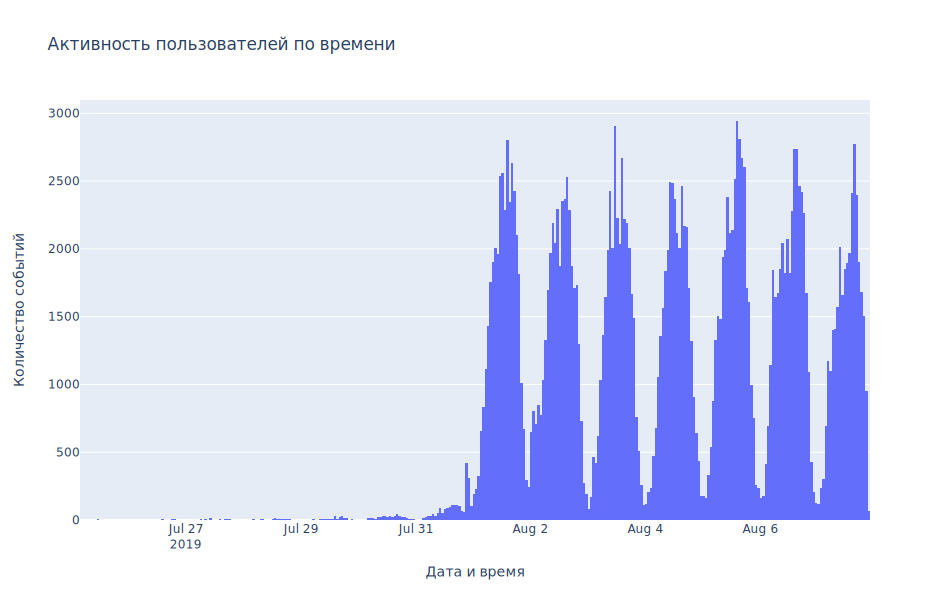

In [10]:
fig = px.histogram(df, x='date_time', title='Активность пользователей по времени')
fig.update_layout(xaxis_title='Дата и время', yaxis_title='Количество событий')
fig.show()

Очевидно, что у нас имеются неодинаково полные данные за весь период, т.к. технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные».  
Полные данные имеют волнообразный характер (ночью - снижение активности) в течение недели с 01.08 по 07.08, поэтому отбросим более старые.  
Определим, много ли событий и пользователей мы потеряли, отбросив старые данные, и проверим, что у нас есть пользователи из всех трёх экспериментальных групп.

In [11]:
df_old = df.query('date_time < "2019-08-01"')
print('Количество потерянных событий:', df_old.shape[0])
print('Количество потерянных уникальных пользователей:', 
      df.user_id.nunique() - df.query('date_time > "2019-08-01"')
      .user_id.nunique())

Количество потерянных событий: 2826
Количество потерянных уникальных пользователей: 17


Количество потерянных совсем незначительно, всего около 1%. При этом, потеря пользователей составила всего 0,2%, так что этими данными можно безболезненно пренебречь.

In [12]:
#Ограничим наш ДФ периодом, где мы имеем полные данные.
df = df.query('date_time > "2019-08-01"')
print('Данные представлены за следующий период:', df.date.min(), df.date.max())
df

Данные представлены за следующий период: 2019-08-01 2019-08-07


,event,user_id,event_timestamp,group,date_time,date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [13]:
#Определим, остались ли у нас пользователи со всех групп. 
(df.pivot_table(index='group', aggfunc={'user_id': 'nunique'})
   .rename(columns={'user_id': 'number_users'}))

,number_users
group,
246,2484
247,2513
248,2537


### Вывод

<div style="border:solid green 2px; padding: 20px">

Проведя первичный анализ данных, можно сделать следующие выводы:     
- количество событий: 243713, количество уникальных пользователей: 7551, в среднем 32 события приходится на пользователя  
- данные представлены **за период с 2019-07-25 по 2019-08-07**, но эти данные неодинаково полные, т.к. технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные»  
- **полные данные** имеют волнообразный характер (ночью - снижение активности) в течение недели **с 01.08.2019 по 07.08.2019**, поэтому оставим данные только за этот период  
- после очистки от неполных данных было потеряно 1% событий (2826) и 0,2% пользователей (17), так что эти данные можно спокойно удалить для получения более достоверных результатов.

## Воронка событий

Для построения воронки событий определим, какие вообще события имеются в нашем ДФ.

In [14]:
df.event.value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

Имеется несколько событий у пользователей:
- посетили главную страницу
- открыли каталог
- начали оформлять заказ
- оплатили товар
- обучение  

Посмотрим, сколько пользователей совершали каждое событие и процент пользователей, совершивших это событие.

In [15]:
df_events = (df.pivot_table(index='event', aggfunc={'user_id': 'nunique'})
               .rename(columns={'user_id': 'number_users'})
               .append({'number_users':df['user_id'].nunique()}, ignore_index=True)
               .sort_values(by='number_users', ascending=False))
df_events['percent'] = (df_events/df.user_id.nunique())
df_events.style.format({'percent': '{:.2%}'})

,number_users,percent
5,7534,100.00%
1,7419,98.47%
2,4593,60.96%
0,3734,49.56%
3,3539,46.97%
4,840,11.15%


Очевидно, что в таком порядке события и происходят, выстраиваясь в последовательную цепочку. Основной экран видят 98,5% пользователей (возможно, кто-то переходит в магазин напрямую по ссылке или же имеется некий технический сбой в телеметрии), а до успешной оплаты доходит 47%. Исключение составляет обучение, которое проходит 11% пользователей, поэтому исключим его из последующих расчетов и посмотрим на воронку событий.

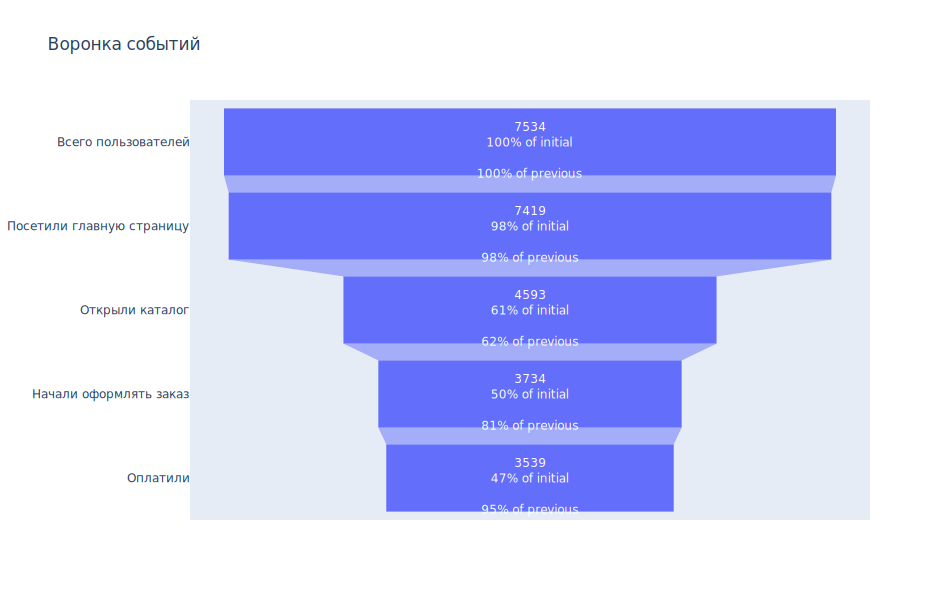

In [16]:
df_events = df_events.head(5)

fig = go.Figure(
    go.Funnel(
        y=[ 'Всего пользователей',
            'Посетили главную страницу',
            'Открыли каталог',
            'Начали оформлять заказ',
            'Оплатили',
        ],
        x=df_events.number_users.tolist(),
        textinfo = "value + percent previous + percent initial",
        textposition = "inside"
    )
)
fig.update_layout(title='Воронка событий')
fig.show()

По воронке видно, что на шаге с появлением окна с товарами теряется больше всего пользователей (38,1%). От первого события с главной страницей до последнего с оплатой доходит 47% пользователей.

### Вывод

<div style="border:solid green 2px; padding: 20px">

В нашем ДФ имеется несколько событий у пользователей:
- посетили главную страницу
- открыли каталог
- начали оформлять заказ
- оплатили товар
- обучение  
 **Основной экран видят 98,5% пользователей, а до успешной оплаты доходит 47%.** Исключение составляет обучение, которое проходит 11% пользователей, поэтому в последующих расчетах его учитывать не будем.
По воронке событий определили, что **на шаге с появлением окна с товарами теряется больше всего пользователей (38,1%).** Возможно, следует проработать технический вопрос **улучшения данного этапа для увеличения конверсии.** 

## Определение корректности разбиения на группы А/А/B-эксперимента

Для начала проверим корректность разделения наличием пользователей, находящихся в нескольких группах.

In [17]:
print('Количество пользователей, находящихся в обеих группах:', 
      len(list(set(df.query('group== "A1"').user_id) & set(df.query('group== "A2"').user_id))))
print('Количество пользователей, находящихся в обеих группах:', 
      len(list(set(df.query('group== "A1"').user_id) & set(df.query('group== "B"').user_id))))
print('Количество пользователей, находящихся в обеих группах:', 
      len(list(set(df.query('group== "A2"').user_id) & set(df.query('group== "B"').user_id))))

Количество пользователей, находящихся в обеих группах: 0
Количество пользователей, находящихся в обеих группах: 0
Количество пользователей, находящихся в обеих группах: 0


Далее вспомним, сколько пользователей у нас в каждой экспериментальной группе.

In [18]:
#Для наглядности переименуем наши группы.
df.group = df.group.replace([246, 247, 248], ['A1', 'A2', 'B'])

df2 = (df[df['event']!='Tutorial'].pivot_table(
    index='event', 
    columns='group', 
    values='user_id',
    aggfunc='nunique')
       .sort_values(by='B', ascending=False).reset_index())
df2

group,event,A1,A2,B
0,MainScreenAppear,2450,2476,2493
1,OffersScreenAppear,1542,1520,1531
2,CartScreenAppear,1266,1238,1230
3,PaymentScreenSuccessful,1200,1158,1181


In [19]:
#Посчитаем общее количество пользователей в каждой группе.
df3 = (df.pivot_table(
    columns='group', 
    values='user_id',
    aggfunc='nunique'))
df3

group,A1,A2,B
user_id,2484,2513,2537


In [20]:
#Объединим наши ДФ.
df = (pd.concat([df3, df2], axis=0).set_index('event')
       .set_axis(['Всего пользователей', 'Посетили главную страницу',
                  'Открыли каталог', 'Начали оформлять заказ',
                  'Оплатили товар'], axis=0))
df

group,A1,A2,B
Всего пользователей,2484,2513,2537
Посетили главную страницу,2450,2476,2493
Открыли каталог,1542,1520,1531
Начали оформлять заказ,1266,1238,1230
Оплатили товар,1200,1158,1181


Посмотрим на разницу конверсии на каждом этапе между контрольными группами, построив воронку событий.

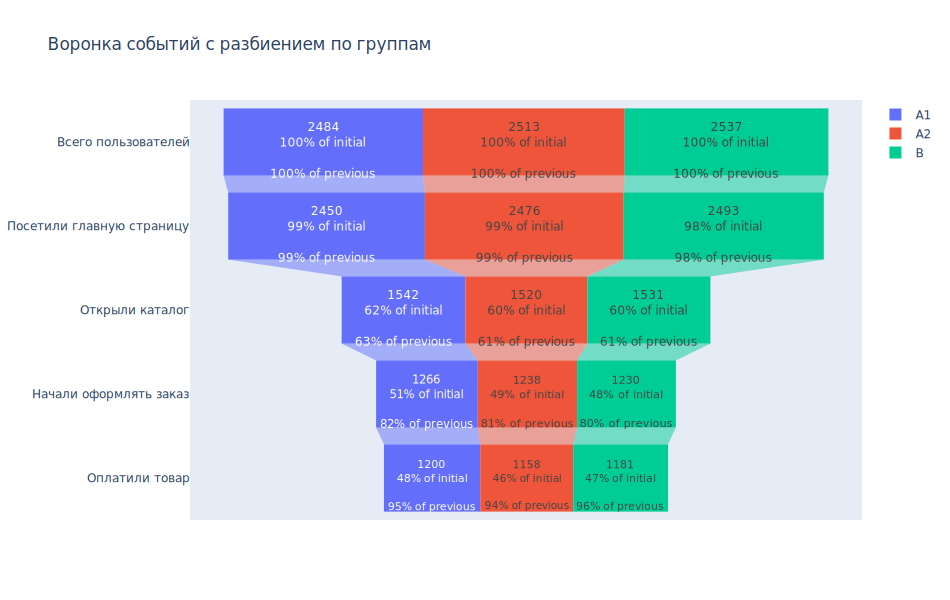

In [21]:
fig = go.Figure()

for i in ('A1', 'A2', 'B'):
    fig.add_trace(go.Funnel(
        name = i,
        y=df.index.tolist(),
        x=df[i].tolist(),
        textinfo = "value + percent previous + percent initial",
        textposition = "inside"
    )
)
fig.update_layout(title='Воронка событий с разбиением по группам')
fig.show()

Видно, что значительной разницы между метриками нет. Проверим, имеется ли у нас статистически значимая разница между контрольными выборками. Для этого сформулируем нулевую и альтернативную гипотезу.

**Нулевая H0:** доли оплативших товар пользователей в группе А1 и в группе А2 равны  
**Альтернативная H1:** доли оплативших товар пользователей в группе А1 и в группе А2 не равны

In [22]:
#Напишем функцию для расчета статистической разницы между группами.
def difference(column_group1, column_group2, row, alpha):
    events = df.index.tolist()
    
    alpha = alpha # критический уровень статистической значимости

    successes = np.array([df.iat[row,column_group1], df.iat[row,column_group2]])
    trials = np.array([df.iat[0,column_group1], df.iat[0,column_group2]])

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2 
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
    )

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print(f'Отвергаем нулевую гипотезу: на этапе "{events[row]}" между долями есть значимая разница')
    else:
        print(
            f'Не получилось отвергнуть нулевую гипотезу, на этапе "{events[row]}" нет оснований считать доли разными'
        ) 

In [23]:
#Используем цикл для проверки разницы на каждом этапе между контрольными группами.
for i in range(1, 5):
    difference (0, 1, i, .05)

p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, на этапе "Посетили главную страницу" нет оснований считать доли разными
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, на этапе "Открыли каталог" нет оснований считать доли разными
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, на этапе "Начали оформлять заказ" нет оснований считать доли разными
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, на этапе "Оплатили товар" нет оснований считать доли разными


По результатам проверки получилось, что статистической разницы между двумя А/А группами нет, значит разбиение на группы работает корректно.

### Вывод

<div style="border:solid green 2px; padding: 20px">

Нами была **успешно проведена проверка корректности разбиения на контрольные группы** по следующим параметрам:
- отсутствие одинаковых пользователей в разных группах
- отсутствие значительной разницы между метриками в воронке событий
- отсутствие статистически значимой разница между контрольными выборками

## Проверка контрольных групп с экспериментальными

Для этого сравним нашу экспериментальную группу с измененными шрифтами сначала с первой контрольной, затем со второй, а после с обеими вместе, сформулировав перед каждым тестом нулевые и альтернативные гипотезы.

**Нулевая H0:** доли оплативших товар пользователей в группе А1 и в группе B равны  
**Альтернативная H1:** доли оплативших товар пользователей в группе А1 и в группе B не равны

In [24]:
#Используем цикл для проверки разницы на каждом этапе между первой контрольной группой и экспериментальной.
for i in range(1, 5):
    difference (0, 2, i, .05)

p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, на этапе "Посетили главную страницу" нет оснований считать доли разными
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, на этапе "Открыли каталог" нет оснований считать доли разными
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, на этапе "Начали оформлять заказ" нет оснований считать доли разными
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, на этапе "Оплатили товар" нет оснований считать доли разными


**Нулевая H0:** доли оплативших товар пользователей в группе А2 и в группе B равны  
**Альтернативная H1:** доли оплативших товар пользователей в группе А2 и в группе B не равны

In [25]:
#Используем цикл для проверки разницы на каждом этапе между второй контрольной группой и экспериментальной.
for i in range(1, 5):
    difference (1, 2, i, .05)

p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, на этапе "Посетили главную страницу" нет оснований считать доли разными
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, на этапе "Открыли каталог" нет оснований считать доли разными
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, на этапе "Начали оформлять заказ" нет оснований считать доли разными
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, на этапе "Оплатили товар" нет оснований считать доли разными


Между контрольными группами по отдельности и экспериментальной статистической разницы нет. Сравним их вместе.

In [26]:
df['A1+A2'] = df.A1 + df.A2
df

group,A1,A2,B,A1+A2
Всего пользователей,2484,2513,2537,4997
Посетили главную страницу,2450,2476,2493,4926
Открыли каталог,1542,1520,1531,3062
Начали оформлять заказ,1266,1238,1230,2504
Оплатили товар,1200,1158,1181,2358


**Нулевая H0:** доли оплативших товар пользователей в группах А1 и А2 совместно и в группе B равны  
**Альтернативная H1:** доли оплативших товар пользователей в группе А1 и А2 совместно и в группе B не равны

In [27]:
#Используем цикл для проверки разницы на каждом этапе между контрольными группами и экспериментальной.
for i in range(1, 5):
    difference (3, 2, i, .05)

p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, на этапе "Посетили главную страницу" нет оснований считать доли разными
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, на этапе "Открыли каталог" нет оснований считать доли разными
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, на этапе "Начали оформлять заказ" нет оснований считать доли разными
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, на этапе "Оплатили товар" нет оснований считать доли разными


Между контрольными группами совместно и экспериментальной статистической разницы нет. При этом, мы применили критический уровень статистической значимости 0.05. В случае, если бы был выбран уровень 0.1, то была бы допущена ошибка первого рода - была бы отвергнута нулевая гипотеза - на этапе "Начали оформлять заказ" между первой контрольной группой и экспериментальной была бы значимая разница.    
При этом, мы провели в сумме 16 проверок, что математически повышает групповую вероятность ошибки первого рода. Возможно было бы использовать некие поправки на множественные сравнения - как, например, Бонферрони, - сильно занижая значение альфы (делим на 16), но т.к. мы не получили ни одного значимого результата при alpha=0.05, очевидно, что снижая это значение любым методом, мы не получим других результатов.

### Вывод

<div style="border:solid green 2px; padding: 20px">

Применив статистические критерии, были сделаны следующие выводы:
- **между контрольными группами по отдельности и экспериментальной статистической разницы нет**   
- **между контрольными группами совместно и экспериментальной статистической разницы нет**  
При этом, мы применили критический уровень статистической значимости 0.05. В случае, если бы был выбран уровень 0.1, то была бы допущена ошибка первого рода - была бы отвергнута нулевая гипотеза - на этапе "Начали оформлять заказ" между первой контрольной группой и экспериментальной была бы значимая разница.  
При этом, мы провели в сумме 16 проверок, что математически повышает групповую вероятность ошибки первого рода. Возможно было бы использовать некие поправки на множественные сравнения - как, например, Бонферрони, - сильно занижая значение альфы (делим на 16), но т.к. мы не получили ни одного значимого результата при alpha=0.05, очевидно, что снижая это значение любым методом, мы не получим других результатов.

## Выводы

<div style="border:solid green 2px; padding: 20px">

Проведя исследование и анализ поведения пользователей нашего мобильного приложения, можно сделать следующие выводы:
- данные были обработаны в части названий столбцов, наличия дубликатов и добавления дополнительных столбцов с датами и временем  

    
- количество событий: 243713, количество уникальных пользователей: 7551, в среднем 32 события приходится на пользователя  
- данные представлены **за период с 2019-07-25 по 2019-08-07**, но эти данные неодинаково полные, т.к. технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные»  
- **полные данные** имеют волнообразный характер (ночью - снижение активности) в течение недели **с 01.08.2019 по 07.08.2019**, поэтому оставили данные только за этот период  
- после очистки от неполных данных было потеряно 1% событий (2826) и 0,2% пользователей (17), что не влияет на достоверность результатов  

    
- в нашем ДФ имеется несколько событий у пользователей:
    - посетили главную страницу
    - открыли каталог
    - начали оформлять заказ
    - оплатили товар
    - обучение    
- **основной экран видят 98,5% пользователей, а до успешной оплаты доходит 47%.** Исключение составляет обучение, которое проходит 11% пользователей, поэтому в последующих расчетах его не учитывали
- по воронке событий определили, что **на шаге с появлением окна с товарами теряется больше всего пользователей (38,1%).**   

    
- нами была **успешно проведена проверка корректности разбиения на контрольные группы** по следующим параметрам:
    - отсутствие одинаковых пользователей в разных группах
    - отсутствие значительной разницы между метриками в воронке событий
    - отсутствие статистически значимой разница между контрольными выборками  

    
- **между контрольными группами по отдельности и экспериментальной статистической разницы нет**   
- **между контрольными группами совместно и экспериментальной статистической разницы нет**  
- мы применили критический уровень статистической значимости 0.05. В случае, если бы был выбран уровень 0.1, то была бы допущена ошибка первого рода - была бы отвергнута нулевая гипотеза - на этапе "Начали оформлять заказ" между первой контрольной группой и экспериментальной была бы значимая разница.
- при этом, мы провели в сумме 16 проверок, что математически повышает групповую вероятность ошибки первого рода. Возможно было бы использовать некие поправки на множественные сравнения - как, например, Бонферрони, - сильно занижая значение альфы (делим на 16), но т.к. мы не получили ни одного значимого результата при alpha=0.05, очевидно, что снижая это значение любым методом, мы не получим других результатов.

**А/А/В-тест по изменению шрифтов проведен корректно, но без положительного результата - статистической разницы между новыми и старыми шрифтов нет. При этом, целесообразным выглядит заняться проработкой вопроса улучшения этапа с появлением окна с товарами, где у нас теряется больше всего пользователей (38,1%) для увеличения конверсии.** 